In [14]:
import numpy as np
import qiskit as qk
import matplotlib.pyplot as plt
from qiskit import Aer
from sklearn.decomposition import PCA
from tqdm.notebook import tqdm

import sys
sys.path.insert(0, '../../src/')
from neuralnetwork import *
from analysis import *
from utils import *

#%matplotlib notebook
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [15]:
backend = Aer.get_backend('qasm_simulator')

# Trainability

## 1D, Gaussian Function

### Generate Data

In [16]:
n = 100
x = np.linspace(0, 1, n).reshape(-1,1)
y = gaussian(x, 0.25, 0.02) - gaussian(x, 0.75, 0.02) 

x_qnn = scaler(x, a=-np.pi/2, b=np.pi/2)
x_dnn = scaler(x, mode="standard")
y = scaler(y, a=0, b=1)
print(y.shape)

(100, 1)


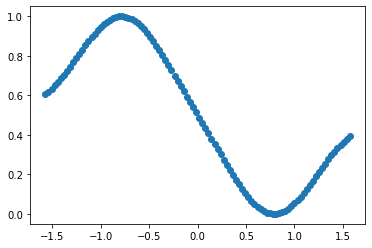

In [17]:
plt.plot(x_qnn, y, 'o')
plt.show()

### Training Models

In [19]:
np.random.seed(42)

qnn_list = []
for i in tqdm(range(1)):
    qnn = sequential_qnn(n_qubits = [1, 4],
                         dim = [1, 4, 1],
                         encoder = Encoder(),
                         ansatz = Ansatz(reps=1),
                         sampler = Parity(),
                         cost = MSE(),
                         optimizer = Adam(lr=0.1),
                         backend = backend,
                         shots = 10000)
    
    qnn.train(x_qnn, y, epochs=100, verbose=True)
    qnn_list.append(qnn)

saver(qnn_list, data_path("trainability_qnn_1D_reps_1"))

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

epoch: 0, loss: 0.15825790595527361
epoch: 1, loss: 0.12735278513116152
epoch: 2, loss: 0.10392966991292119
epoch: 3, loss: 0.0937770610623953
epoch: 4, loss: 0.09148459974052894
epoch: 5, loss: 0.08892663061745264
epoch: 6, loss: 0.08311260854090921
epoch: 7, loss: 0.0752122529931185
epoch: 8, loss: 0.06901820578643234
epoch: 9, loss: 0.06386550618617223
epoch: 10, loss: 0.060678930667068004
epoch: 11, loss: 0.058095020316610985
epoch: 12, loss: 0.05493275908418333
epoch: 13, loss: 0.051942485725967665
epoch: 14, loss: 0.04787416762352732
epoch: 15, loss: 0.042887105592977884
epoch: 16, loss: 0.037396089846985434
epoch: 17, loss: 0.03222381673942063
epoch: 18, loss: 0.028990754395448085
epoch: 19, loss: 0.027636782688305134
epoch: 20, loss: 0.02690722725082155
epoch: 21, loss: 0.025998624084268927
epoch: 22, loss: 0.024535946023192694
epoch: 23, loss: 0.019941675723534457
epoch: 24, loss: 0.015529841575456959
epoch: 25, loss: 0.011052801591700783
epoch: 26, loss: 0.009049206719963012


Process ForkProcess-22940:
KeyboardInterrupt
Process ForkProcess-22936:
Traceback (most recent call last):
Traceback (most recent call last):
  File "/home/kristian/anaconda3/envs/env_qiskit/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/home/kristian/anaconda3/envs/env_qiskit/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/home/kristian/anaconda3/envs/env_qiskit/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/home/kristian/anaconda3/envs/env_qiskit/lib/python3.9/concurrent/futures/process.py", line 237, in _process_worker
    call_item = call_queue.get(block=True)
  File "/home/kristian/anaconda3/envs/env_qiskit/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/home/kristian/anaconda3/envs/env_qiskit/lib/python3.9/multiprocessing/queues.py", line 122, in get
    return 

QiskitError: 'Keyboard interrupt in parallel_map.'

In [18]:
np.random.seed(42)

qnn_list = []
for i in tqdm(range(1)):
    qnn = sequential_qnn(n_qubits = [1, 4, 4, 4],
                         dim = [1, 4, 4, 4, 4],
                         encoder = Encoder(),
                         ansatz = Ansatz(reps=1),
                         sampler = Parity(),
                         cost = MSE(),
                         optimizer = Adam(lr=0.1),
                         backend = backend,
                         shots = 10000)
    
    qnn.train(x_qnn, y, epochs=100, verbose=True)
    qnn_list.append(qnn)

saver(qnn_list, data_path("trainability_qnn_1D_depth_4_reps_1"))

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

epoch: 0, loss: 0.137919864221096
epoch: 1, loss: 0.10830666746339025


Process ForkProcess-3677:
KeyboardInterrupt
Traceback (most recent call last):
  File "/home/kristian/anaconda3/envs/env_qiskit/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/home/kristian/anaconda3/envs/env_qiskit/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/home/kristian/anaconda3/envs/env_qiskit/lib/python3.9/concurrent/futures/process.py", line 253, in _process_worker
    del call_item


QiskitError: 'Keyboard interrupt in parallel_map.'

In [ ]:
np.random.seed(42)

qnn_list = []
for i in tqdm(range(1)):
    qnn = sequential_qnn(n_qubits = [1, 4],
                         dim = [1, 4, 1],
                         encoder= Encoder(),
                         ansatz = Ansatz(reps=2),
                         sampler = Parity(),
                         cost = MSE(),
                         optimizer = Adam(lr=0.1),
                         backend=backend,
                         shots=10000)
    qnn.train(x_qnn, y, epochs=100, verbose=True)
    qnn_list.append(qnn)

saver(qnn_list, data_path("trainability_qnn_1D_reps_2"))

In [5]:
np.random.seed(42)
dnn_list = []
for i in range(1):
    dnn = sequential_dnn(dim = [1, 5, 1],
                         optimizer = Adam(lr=0.1))
    
    dnn.train(x_dnn, y, epochs=1000)
    dnn_list.append(dnn)

saver(dnn_list, data_path("trainability_dnn_1D"))

## 2D function

### Generate Data

In [5]:
np.random.seed(42)

n = 10
x = np.linspace(0, 1, n)
x = generate_meshgrid([x,x])

mean1 = np.array([[0.25, 0.75]])
var1 = np.array([[0.02, 0], [0, 0.02]])

mean2 = np.array([[0.75, 0.25]])
var2 = np.array([[0.02, 0], [0, 0.02]])

mean3 = np.array([[0.25, 0.25]])
var3 = np.array([[0.02, 0], [0, 0.02]])

mean4 = np.array([[0.75, 0.75]])
var4 = np.array([[0.02, 0], [0, 0.02]])

y = gaussian(x, mean1, var1) + gaussian(x, mean2, var2) - gaussian(x, mean3, var3) - gaussian(x, mean4, var4)


x_qnn = scaler(x, a=-np.pi/2, b=np.pi/2)
x_dnn = scaler(x, mode="standard")
y = scaler(y, a=0, b=1)
print(y.shape)

(100, 1)


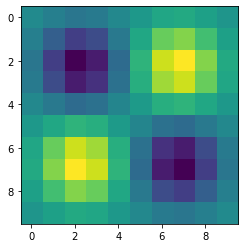

In [6]:
plt.imshow(y.reshape(n,n))
plt.show()

### Training Models

In [ ]:
np.random.seed(42)

qnn_list = []
for i in tqdm(range(1)):
    qnn = sequential_qnn(n_qubits = [2, 4],
                         dim = [2, 4, 1],
                         encoder= Encoder(),
                         ansatz = Ansatz(reps=1),
                         sampler = Parity(),
                         cost = MSE(),
                         optimizer = Adam(lr=0.1),
                         backend=backend,
                         shots=10000)
    qnn.train(x_qnn, y, epochs=100, verbose=True)
    qnn_list.append(qnn)

saver(qnn_list, data_path("trainability_qnn_2D_reps_1"))

In [ ]:
np.random.seed(42)

qnn_list = []
for i in tqdm(range(1)):
    qnn = sequential_qnn(n_qubits = [2, 4],
                         dim = [2, 4, 1],
                         encoder= Encoder(),
                         ansatz = Ansatz(reps=2),
                         sampler = Parity(),
                         cost = MSE(),
                         optimizer = Adam(lr=0.1),
                         backend=backend,
                         shots=10000)
    qnn.train(x_qnn, y, epochs=100, verbose=True)
    qnn_list.append(qnn)

saver(qnn_list, data_path("trainability_qnn_2D_reps_2"))

In [ ]:
np.random.seed(42)
dnn_list = []
for i in range(1):
    dnn = sequential_dnn(dim = [2, 5, 1],
                         optimizer = Adam(lr=0.1))
    
    dnn.train(x_dnn, y, epochs=1000)
    dnn_list.append(dnn)

saver(dnn_list, data_path("trainability_dnn_2D"))

## 3D function

### Generate Data

In [ ]:
np.random.seed(42)

n = 6
x = np.linspace(0, 1, n)
x = generate_meshgrid([x, x, x])

mean1 = np.array([[0.25, 0.25, 0.25]])
mean2 = np.array([[0.25, 0.25, 0.75]])
mean3 = np.array([[0.25, 0.75, 0.75]])
mean4 = np.array([[0.25, 0.75, 0.25]])

mean5 = np.array([[0.75, 0.25, 0.25]])
mean6 = np.array([[0.75, 0.25, 0.75]])
mean7 = np.array([[0.75, 0.75, 0.75]])
mean8 = np.array([[0.75, 0.75, 0.25]])

var = np.array([[0.02, 0, 0], [0, 0.02, 0], [0, 0, 0.02]])

y = gaussian(x, mean1, var) - gaussian(x, mean2, var) + gaussian(x, mean3, var) - gaussian(x, mean4, var) - gaussian(x, mean5, var) + gaussian(x, mean6, var) - gaussian(x, mean7, var) + gaussian(x, mean8, var)

x_qnn = scaler(x, a=-np.pi/2, b=np.pi/2)
x_dnn = scaler(x, mode="standard")
y = scaler(y, a=0, b=1)
print(y.shape)

In [ ]:
plt.imshow(y.reshape(n,n,n)[0])
plt.show()

In [ ]:
np.random.seed(42)

qnn_list = []
for i in tqdm(range(1)):
    qnn = sequential_qnn(n_qubits = [3, 4],
                         dim = [3, 4, 1],
                         encoder= Encoder(),
                         ansatz = Ansatz(reps = 1),
                         sampler = Parity(),
                         cost = MSE(),
                         optimizer = Adam(lr=0.1),
                         backend = backend,
                         shots = 10000)
    qnn.train(x_qnn, y, epochs=100, verbose=True)
    qnn_list.append(qnn)

saver(qnn_list, data_path("trainability_qnn_3D_reps_1"))

In [ ]:
np.random.seed(42)

qnn_list = []
for i in tqdm(range(1)):
    qnn = sequential_qnn(n_qubits = [3, 4],
                         dim = [3, 4, 1],
                         encoder= Encoder(),
                         ansatz = Ansatz(reps = 2),
                         sampler = Parity(),
                         cost = MSE(),
                         optimizer = Adam(lr=0.1),
                         backend = backend,
                         shots = 10000)
    qnn.train(x_qnn, y, epochs=100, verbose=True)
    qnn_list.append(qnn)

saver(qnn_list, data_path("trainability_qnn_3D_reps_2"))

In [ ]:
np.random.seed(42)
dnn_list = []
for i in range(1):
    dnn = sequential_dnn(dim = [3, 5, 1],
                         optimizer = Adam(lr=0.1))
    
    dnn.train(x_dnn, y, epochs=1000)
    dnn_list.append(dnn)

saver(dnn_list, data_path("trainability_dnn_3D"))

### Deep QKN

In [ ]:
np.random.seed(42)

n = 6
x = np.linspace(0, 1, n)
x = generate_meshgrid([x, x, x])

mean1 = np.array([[0.25, 0.25, 0.25]])
mean2 = np.array([[0.25, 0.25, 0.75]])
mean3 = np.array([[0.25, 0.75, 0.75]])
mean4 = np.array([[0.25, 0.75, 0.25]])

mean5 = np.array([[0.75, 0.25, 0.25]])
mean6 = np.array([[0.75, 0.25, 0.75]])
mean7 = np.array([[0.75, 0.75, 0.75]])
mean8 = np.array([[0.75, 0.75, 0.25]])

var = np.array([[0.02, 0, 0], [0, 0.02, 0], [0, 0, 0.02]])

y = gaussian(x, mean1, var) - gaussian(x, mean2, var) + gaussian(x, mean3, var) - gaussian(x, mean4, var) - gaussian(x, mean5, var) + gaussian(x, mean6, var) - gaussian(x, mean7, var) + gaussian(x, mean8, var)

x = scaler(x, a=0, b=np.pi)
y = scaler(y, a=0, b=1)

In [ ]:
plt.imshow(y.reshape(n,n,n)[0])
plt.show()

In [ ]:
np.random.seed(42)


qnn = sequential_qnn(q_bits = [3, 4, 4],
                     dim = [3, 4, 4, 1],
                     reps = 2,
                     backend=backend,
                     shots=10000,
                     lr = 0.1)

qnn.train(x, y, epochs=200, verbose=True)
    
saver(qnn, data_path("trainability_qnn_3D_deep"))

In [ ]:
x = scaler(x, mode="standard")

dnn = sequential_dnn(dim = [3, 6, 5, 1], lr = 0.1)

dnn.train(x, y, epochs=1000, verbose=True)

In [ ]:
plt.plot(qnn.loss)
plt.plot(dnn.loss)
plt.show()

### Hybrid Neural Network

In [ ]:
np.random.seed(42)

n = 6
x = np.linspace(0, 1, n)
x = generate_meshgrid([x, x, x])

mean1 = np.array([[0.25, 0.25, 0.25]])
mean2 = np.array([[0.25, 0.25, 0.75]])
mean3 = np.array([[0.25, 0.75, 0.75]])
mean4 = np.array([[0.25, 0.75, 0.25]])

mean5 = np.array([[0.75, 0.25, 0.25]])
mean6 = np.array([[0.75, 0.25, 0.75]])
mean7 = np.array([[0.75, 0.75, 0.75]])
mean8 = np.array([[0.75, 0.75, 0.25]])

var = np.array([[0.02, 0, 0], [0, 0.02, 0], [0, 0, 0.02]])

y = gaussian(x, mean1, var) - gaussian(x, mean2, var) + gaussian(x, mean3, var) - gaussian(x, mean4, var) - gaussian(x, mean5, var) + gaussian(x, mean6, var) - gaussian(x, mean7, var) + gaussian(x, mean8, var)

x = scaler(x, a=0, b=np.pi)
y = scaler(y, a=-2, b=2)

In [ ]:
np.random.seed(42)

layer1 = QLayer(n_qubits=3, n_features=3, n_targets=3, encoder=Encoder(), ansatz=Ansatz(), sampler=Parity(), reps=2, scale=1, backend=backend, shots=10000)
layer2 = Dense(n_features=3, n_targets=1, activation=Identity())
layers = [layer1, layer2]
network = NeuralNetwork(layers=layers, optimizer = Adam(lr=0.1))

In [ ]:
network.train(x, y, epochs=100, verbose=True)
saver(network, data_path("trainability_hybrid_2_layer"))

## Single Circuit

In [ ]:
n = 100
x = np.linspace(0, 1, n).reshape(-1,1)
y = gaussian(x, 0.3, 0.02) - gaussian(x, 0.7, 0.02) 

x = scaler(x, a=0, b=np.pi)
y = scaler(y, a=0.1, b=0.9)


In [ ]:
plt.plot(x,y)

In [ ]:
qnn = sequential_qnn(q_bits = [3],
                         dim = [3, 1],
                         reps = 3,
                         backend=backend,
                         shots=10000,
                         lr = 0.1)

In [ ]:
qnn.train(x, y, verbose=True)